<a href="https://colab.research.google.com/github/Raihansyah-ai/Python/blob/main/Presensi%20Minggu%2013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muhammad Rafli Raihansyah ||| 1101190170 ||| TT-43-01

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def cos(f,ta,ht,hr,d):
  #f = frekuensi (MHz)
  #ta = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)

    if f in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif f in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if ta=='urban' :
        Cm=0
    elif ta=='suburban' :
        Cm= -2*((np.log10((f/28)**2))-5.4)
    elif ta=='open' :
        Cm= -4.78*(np.log10(f))+18.33*(np.log10(f))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(f)-0.7)*hr-(1.56*np.log10(f)-1.8)
    Lp = Ca+(Cb*np.log10(f))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [9]:
f1 = 1800 #Mhz
f2 = 700 #MHz
f3 = 900 #MHz
ta1 = 'urban'
ta2 = 'suburban'
ta3 = 'open'
ht = 80 #m
hr = 1.5 #m
jarakmax = 700 #m
jarakmin = 200 #m
n = 200 #titik

d = np.random.randint(jarakmin, jarakmax, n)
lpUrban = cos(f1, ta1, ht, hr, d)
lpSuburban = cos(f1, ta2, ht, hr, d)
lpOpen = cos(f1, ta3, ht, hr, d)
lp_1 = cos(f2, ta1, ht, hr, d)
lp_2 = cos(f2, ta1, ht, hr, d)
lp_3 = cos(f1, ta1, ht, hr, d)
dsort = d[np.argsort(d)]
urban_sort = lpUrban[np.argsort(d)]
suburban_sort = lpSuburban[np.argsort(d)]
open_sort = lpOpen[np.argsort(d)]
MHz_sort1 = lp_1[np.argsort(d)]
MHz_sort2 = lp_2[np.argsort(d)]
MHz_sort3 = lp_3[np.argsort(d)]

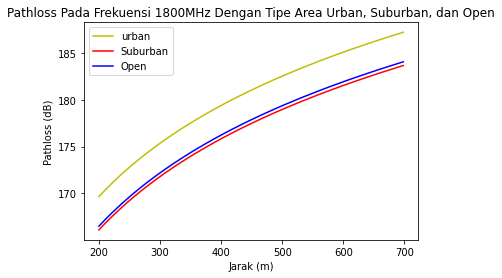

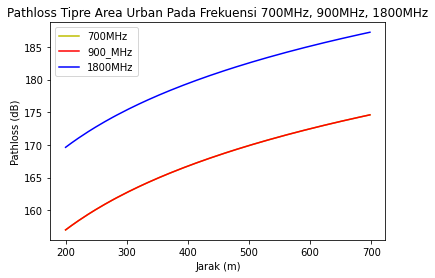

In [10]:
#grafik 1
plt.plot(dsort, urban_sort, 'y')
plt.plot(dsort, suburban_sort, 'r')
plt.plot(dsort, open_sort, 'b')
plt.title('Pathloss Pada Frekuensi 1800MHz Dengan Tipe Area Urban, Suburban, dan Open')
plt.ylabel('Pathloss (dB)')
plt.xlabel('Jarak (m)')
plt.legend(['urban', 'Suburban', 'Open'], loc='upper left')
plt.show()

#grafik 2
plt.plot(dsort, MHz_sort1, 'y')
plt.plot(dsort, MHz_sort2, 'r')
plt.plot(dsort, MHz_sort3, 'b')
plt.title('Pathloss Tipre Area Urban Pada Frekuensi 700MHz, 900MHz, 1800MHz')
plt.ylabel('Pathloss (dB)')
plt.xlabel('Jarak (m)')
plt.legend(['700MHz', '900_MHz', '1800MHz'], loc='upper left')
plt.show()